In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import math
# style.use('ggplot')

In [3]:
def Timestamp_mapping(n):
    historic = pd.read_csv("BTCUSD_2018_1min_Raw.csv",index_col=False)
    pd.to_datetime(historic.Date,errors='raise')
    temp = 86400 * n
    historic['UnixTime'] = historic.Date.apply(lambda x :int(calendar.timegm(datetime.datetime.strptime(x,"%d-%m-%y %H:%M").timetuple())) + temp)
    historic.to_csv('BTCUSD_2018_Output.csv',sep=',',encoding='utf-8')

In [4]:
def Mapping(news,twit):
    df_news = pd.read_csv(f"{news}.csv",index_col=False)
    df_twit = pd.read_csv(f"{twit}.csv",index_col=False)
    df_hist = pd.read_csv('BTCUSD_2018_Output.csv',index_col=False)
    cols=["UnixTime","UnixTime"]
    mapped = pd.DataFrame(df_news.merge(df_twit,on=cols,how='inner'))
    final = pd.DataFrame(mapped.merge(df_hist,on = cols,how='inner'))
    final.to_csv('Mapped_Final_Output.csv',sep=',',encoding = 'utf-8')

In [8]:
Timestamp_mapping(3)
Mapping("LP_12_Oct_to_14_Nov_18","mergefile")

In [2]:
df = pd.read_csv('Mapped_Final.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High','UnixTime'])
df.head()

,UnixTime,News_Label,Twitt_Label,High,Volume
0,1540655760,0,0,6394.18,0.005533
1,1540655760,0,0,6394.18,0.005533
2,1540655760,0,0,6394.18,0.005533
3,1540655760,0,0,6394.18,0.005533
4,1540655760,0,0,6394.18,0.005533


In [11]:
df.describe()

,UnixTime,News_Label,Twitt_Label,High,Volume
count,3.241800e+04,32418.000000,32418.000000,32418.000000,32418.000000
mean,1.540785e+09,0.032667,0.073724,6350.714386,2.228470
std,8.383551e+05,0.214564,0.263910,66.495662,12.354142
min,1.539475e+09,-1.000000,-2.000000,6181.540000,0.000000
25%,1.540094e+09,0.000000,0.000000,6280.490000,0.002718
50%,1.540662e+09,0.000000,0.000000,6385.010000,0.082848
75%,1.541029e+09,0.000000,0.000000,6403.750000,1.076639
max,1.542153e+09,1.000000,1.000000,6676.170000,350.203804


In [12]:
df.drop_duplicates(inplace=True)
df.sort_values(by='UnixTime',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.describe())
df.head()

           UnixTime   News_Label  Twitt_Label         High       Volume
count  3.863000e+03  3863.000000  3863.000000  3863.000000  3863.000000
mean   1.540516e+09     0.042454     0.119337  6370.965182     2.354920
std    6.662657e+05     0.267832     0.332896    61.678111    13.255993
min    1.539475e+09    -1.000000    -2.000000  6181.540000     0.000000
25%    1.539983e+09     0.000000     0.000000  6314.880000     0.007764
50%    1.540483e+09     0.000000     0.000000  6393.310000     0.198185
75%    1.540835e+09     0.000000     0.000000  6407.285000     1.353645
max    1.542153e+09     1.000000     1.000000  6676.170000   350.203804


,UnixTime,News_Label,Twitt_Label,High,Volume
0,1539475200,0,0,6195.00,3.521828
1,1539475200,-1,0,6195.00,3.521828
2,1539475200,1,0,6195.00,3.521828
3,1539496800,0,0,6248.40,0.000000
4,1539529200,0,0,6230.19,0.000000


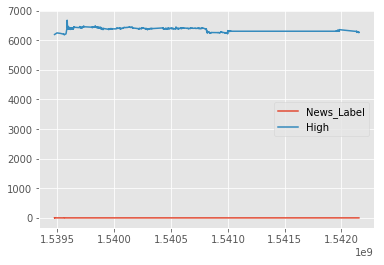

In [15]:
# df.High = df.High / np.mean(df.High)
plt.plot(df.UnixTime,df.News_Label)
plt.plot(df.UnixTime,df.High)
plt.legend()

### Output dataset columns

In [2]:
y = pd.read_csv('Mapped_Final_Output.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High','UnixTime'],)
y.head()

,UnixTime,News_Label,Twitt_Label,High,Volume
0,1540655760,0,0,6416.81,1.897012
1,1540655760,0,0,6416.81,1.897012
2,1540655760,0,0,6416.81,1.897012
3,1540655760,0,0,6416.81,1.897012
4,1540655760,0,0,6416.81,1.897012


In [18]:
y.describe()

,UnixTime,News_Label,Twitt_Label,High,Volume
count,3.241800e+04,32418.000000,32418.000000,32418.000000,32418.000000
mean,1.540785e+09,0.032667,0.073724,6376.898976,1.311370
std,8.383551e+05,0.214564,0.263910,69.818869,7.408240
min,1.539475e+09,-1.000000,-2.000000,6153.730000,0.000000
25%,1.540094e+09,0.000000,0.000000,6368.290000,0.000000
50%,1.540662e+09,0.000000,0.000000,6399.170000,0.033972
75%,1.541029e+09,0.000000,0.000000,6410.760000,0.589507
max,1.542153e+09,1.000000,1.000000,6676.550000,292.796012


In [19]:
y.drop_duplicates(inplace=True)
y.sort_values(by='UnixTime',inplace=True)
y.reset_index(drop=True,inplace=True)
print(y.describe())
y.head()

           UnixTime   News_Label  Twitt_Label         High       Volume
count  3.863000e+03  3863.000000  3863.000000  3863.000000  3863.000000
mean   1.540516e+09     0.042454     0.119337  6375.419912     1.892484
std    6.662657e+05     0.267832     0.332896    72.859767     9.709963
min    1.539475e+09    -1.000000    -2.000000  6153.730000     0.000000
25%    1.539983e+09     0.000000     0.000000  6383.460000     0.002410
50%    1.540483e+09     0.000000     0.000000  6398.740000     0.108709
75%    1.540835e+09     0.000000     0.000000  6411.160000     1.035650
max    1.542153e+09     1.000000     1.000000  6676.550000   292.796012


,UnixTime,News_Label,Twitt_Label,High,Volume
0,1539475200,0,0,6529.75,2.216576
1,1539475200,-1,0,6529.75,2.216576
2,1539475200,1,0,6529.75,2.216576
3,1539496800,0,0,6205.47,0.102874
4,1539529200,0,0,6214.97,2.123031


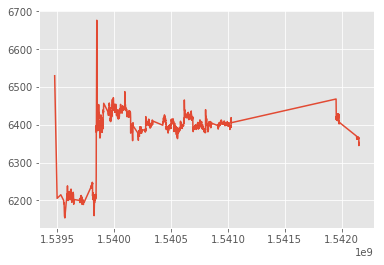

In [45]:
# df.High = df.High / np.mean(df.High)
# plt.plot(y.UnixTime,y.News_Label)
plt.plot(y.UnixTime,y.High)
plt.legend()

In [51]:
def draw_relation(y,relation,name): 
    fig, ax1 = plt.subplots()

    color = 'lightgreen'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel(f'{name}',color = color)
    ax1.plot(y.UnixTime,relation,color = color)
    ax1.tick_params(axis='y',labelcolor=color)

    ax2 = ax1.twinx()
    color = 'navy'
    ax2.set_ylabel('Output',color = color)
    ax2.plot(y.UnixTime,y.High,color = color)
    ax2.tick_params(axis='y',labelcolor = color)

    fig.tight_layout()
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.show()

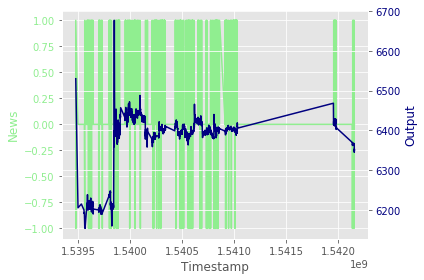

In [52]:
draw_relation(y,df.News_Label,'News')

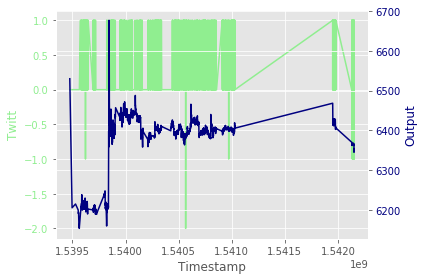

In [33]:
draw_relation(y,df.Twitt_Label,"Twitt")

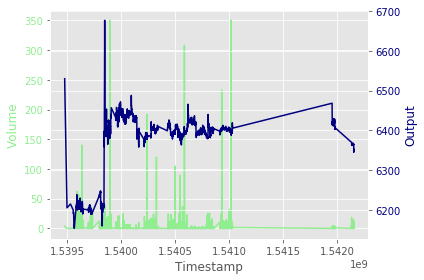

In [34]:
draw_relation(y,df.Volume,'Volume')

## More visualization 

In [5]:
df["Output"] = y.High

In [6]:
df.head()

,UnixTime,News_Label,Twitt_Label,High,Volume,Output
0,1540655760,0,0,6394.18,0.005533,6416.81
1,1540655760,0,0,6394.18,0.005533,6416.81
2,1540655760,0,0,6394.18,0.005533,6416.81
3,1540655760,0,0,6394.18,0.005533,6416.81
4,1540655760,0,0,6394.18,0.005533,6416.81


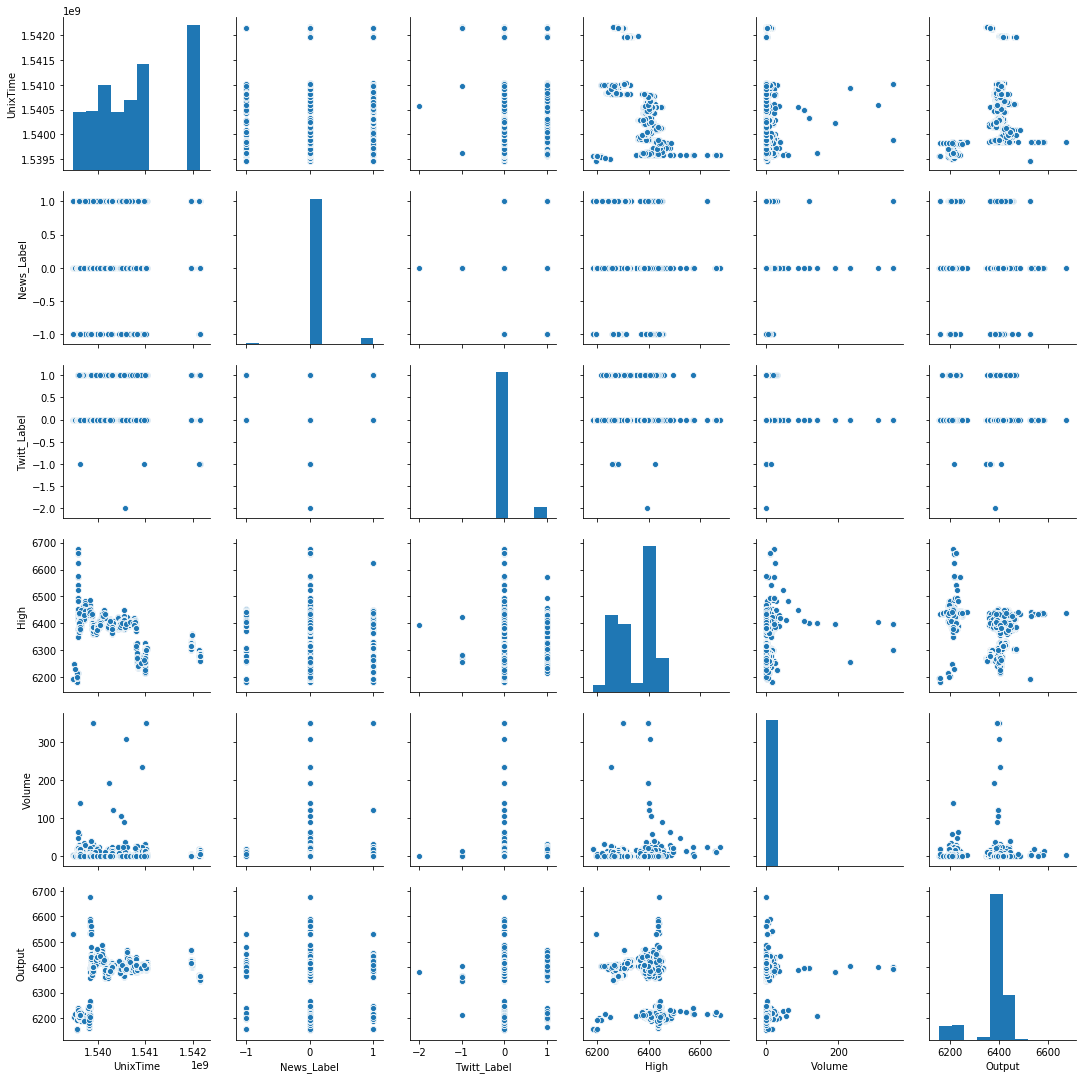

In [12]:
sns.pairplot(df)

In [48]:
res = [(round((df.High[i] - df.High[i-1]),2),df.High[i]) for i in range(1,len(df.High)) if df.High[i] - df.High[i-1] > 10.0]
print(res)

[(132.14, 6402.57), (97.18, 6278.72), (161.91, 6401.24), (156.04, 6409.05), (30.95, 6440.0), (126.39, 6405.1), (147.99, 6398.73), (24.68, 6410.01), (17.69, 6393.0), (11.39, 6404.14), (42.99, 6311.0), (93.26, 6404.26), (17.5, 6408.01), (54.07, 6448.92), (150.01, 6420.0), (31.03, 6451.03), (128.09, 6401.09), (21.3, 6410.98), (51.47, 6420.01), (14.12, 6399.24), (16.61, 6400.61), (37.45, 6412.0), (12.2, 6412.91), (123.22, 6543.23), (15.19, 6434.38), (44.04, 6452.95), (45.09, 6439.58), (23.75, 6435.04), (19.96, 6455.0), (28.5, 6446.44), (17.42, 6434.91), (13.87, 6448.78), (28.81, 6441.57), (41.71, 6441.56), (234.61, 6676.17), (62.32, 6452.07), (20.18, 6445.01), (13.19, 6448.88), (14.0, 6462.88), (22.7, 6466.0), (10.39, 6445.06), (34.1, 6458.42), (13.44, 6448.89), (13.47, 6408.48), (27.2, 6435.68), (54.29, 6432.33), (21.5, 6387.99), (17.01, 6405.0), (13.96, 6394.11), (13.23, 6390.99), (39.12, 6430.11), (28.0, 6405.0), (10.2, 6408.77), (11.6, 6405.0), (11.46, 6408.9), (36.2, 6433.2), (26.08, 

In [49]:
print(len(res))
# print(np.mean(res[0:,:][]))
# print(np.min(res),np.max(res))
# print(np.std(res))

844


In [79]:
day = []
value = []
a = 1539302400
for i in range(32):
    b = a+86399
#     print(a,b)
    temp = df.High[(df.UnixTime > a) & (df.UnixTime < b)]
    day.append(datetime.datetime.utcfromtimestamp(a).strftime('%Y-%m-%d %H:%M:%S'))
    value.append(temp.max())
#     print(temp.mean())
    a+=86400
print(day)
print(value)
day_wise = pd.DataFrame()
day_wise["Date"] = day
day_wise['High'] = value
day_wise

['2018-10-12 00:00:00', '2018-10-13 00:00:00', '2018-10-14 00:00:00', '2018-10-15 00:00:00', '2018-10-16 00:00:00', '2018-10-17 00:00:00', '2018-10-18 00:00:00', '2018-10-19 00:00:00', '2018-10-20 00:00:00', '2018-10-21 00:00:00', '2018-10-22 00:00:00', '2018-10-23 00:00:00', '2018-10-24 00:00:00', '2018-10-25 00:00:00', '2018-10-26 00:00:00', '2018-10-27 00:00:00', '2018-10-28 00:00:00', '2018-10-29 00:00:00', '2018-10-30 00:00:00', '2018-10-31 00:00:00', '2018-11-01 00:00:00', '2018-11-02 00:00:00', '2018-11-03 00:00:00', '2018-11-04 00:00:00', '2018-11-05 00:00:00', '2018-11-06 00:00:00', '2018-11-07 00:00:00', '2018-11-08 00:00:00', '2018-11-09 00:00:00', '2018-11-10 00:00:00', '2018-11-11 00:00:00', '2018-11-12 00:00:00']
[nan, nan, 6248.4, 6676.17, 6482.62, 6450.02, 6487.77, 6396.57, 6415.0, 6449.97, 6415.0, 6415.43, nan, 6422.0, 6450.0, 6425.0, 6418.97, 6414.12, 6279.99, 6326.88, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6359.55, nan]


,Date,High
0,2018-10-12 00:00:00,NaN
1,2018-10-13 00:00:00,NaN
2,2018-10-14 00:00:00,6248.40
3,2018-10-15 00:00:00,6676.17
4,2018-10-16 00:00:00,6482.62
5,2018-10-17 00:00:00,6450.02
6,2018-10-18 00:00:00,6487.77
7,2018-10-19 00:00:00,6396.57
8,2018-10-20 00:00:00,6415.00
9,2018-10-21 00:00:00,6449.97


## Mapped for missing

In [23]:
per_min = pd.read_csv('BTCUSD_2018_1min.csv',index_col=False)
print(per_min.dtypes)
per_min.tail()

Unix Timestamp    float64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
UnixTime            int64
dtype: object


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,UnixTime
490102,1.514765e+09,01-01-18 0:04,BTCUSD,13772.85,13772.85,13750.00,13750.00,6.171053,1514765040
490103,1.514765e+09,01-01-18 0:03,BTCUSD,13775.00,13775.00,13772.85,13772.85,1.040767,1514764980
490104,1.514765e+09,01-01-18 0:02,BTCUSD,13800.00,13800.00,13775.00,13775.00,1.747634,1514764920
490105,1.514765e+09,01-01-18 0:01,BTCUSD,13775.00,13804.74,13775.00,13800.00,0.933856,1514764860
490106,1.514765e+09,01-01-18 0:00,BTCUSD,13820.26,13820.26,13775.00,13775.00,0.000072,1514764800


In [4]:
per_hr = pd.read_csv('BTCUSD_2018_1hr.csv',index_col=False)
print(per_hr.dtypes)
per_hr.head()

Unix Timestamp    float64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.553390e+12,24-03-19 0:00,BTCUSD,3982.45,3982.45,3977.07,3977.07,7.942123
1,1.553380e+12,23-03-19 23:00,BTCUSD,3978.32,3985.57,3977.00,3982.45,14.053055
2,1.553380e+12,23-03-19 22:00,BTCUSD,3978.01,3978.98,3977.01,3978.32,9.990499
3,1.553370e+12,23-03-19 21:00,BTCUSD,3972.52,3978.66,3971.21,3978.01,28.167853
4,1.553370e+12,23-03-19 20:00,BTCUSD,3972.68,3973.33,3970.09,3972.52,22.960540


In [5]:
per_hr['temp'] = pd.to_datetime(per_hr.Date,errors='raise')
per_hr.dtypes

Unix Timestamp           float64
Date                      object
Symbol                    object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
temp              datetime64[ns]
dtype: object

In [6]:
per_hr.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,temp
0,1.553390e+12,24-03-19 0:00,BTCUSD,3982.45,3982.45,3977.07,3977.07,7.942123,2019-03-24 00:00:00
1,1.553380e+12,23-03-19 23:00,BTCUSD,3978.32,3985.57,3977.00,3982.45,14.053055,2019-03-23 23:00:00
2,1.553380e+12,23-03-19 22:00,BTCUSD,3978.01,3978.98,3977.01,3978.32,9.990499,2019-03-23 22:00:00
3,1.553370e+12,23-03-19 21:00,BTCUSD,3972.52,3978.66,3971.21,3978.01,28.167853,2019-03-23 21:00:00
4,1.553370e+12,23-03-19 20:00,BTCUSD,3972.68,3973.33,3970.09,3972.52,22.960540,2019-03-23 20:00:00


In [7]:
per_hr.drop(columns=['temp'])
per_hr['UnixTime'] = per_hr.Date.apply(lambda x: int(calendar.timegm(datetime.datetime.strptime(x,'%d-%m-%y %H:%M').timetuple())))
per_hr.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,temp,UnixTime
0,1.553390e+12,24-03-19 0:00,BTCUSD,3982.45,3982.45,3977.07,3977.07,7.942123,2019-03-24 00:00:00,1553385600
1,1.553380e+12,23-03-19 23:00,BTCUSD,3978.32,3985.57,3977.00,3982.45,14.053055,2019-03-23 23:00:00,1553382000
2,1.553380e+12,23-03-19 22:00,BTCUSD,3978.01,3978.98,3977.01,3978.32,9.990499,2019-03-23 22:00:00,1553378400
3,1.553370e+12,23-03-19 21:00,BTCUSD,3972.52,3978.66,3971.21,3978.01,28.167853,2019-03-23 21:00:00,1553374800
4,1.553370e+12,23-03-19 20:00,BTCUSD,3972.68,3973.33,3970.09,3972.52,22.960540,2019-03-23 20:00:00,1553371200


In [8]:
day = []
value = []
a = 1546300740
for i in range(365):
    b = a-86399
#     print(a,b)
    temp = per_min.High[(per_min.UnixTime > b) & (per_min.UnixTime < a)]
    if math.isnan(temp.max()):
        day.append(datetime.datetime.utcfromtimestamp(a).strftime('%Y-%m-%d %H:%M:%S'))
        value.append(temp.max())
#     print(temp.mean())
    a-=86400
# print(day)
# print(value)
day_wise = pd.DataFrame()
day_wise["Date"] = day
day_wise['High'] = value
day_wise

,Date,High
0,2018-12-06 23:59:00,NaN
1,2018-12-05 23:59:00,NaN
2,2018-12-04 23:59:00,NaN
3,2018-12-03 23:59:00,NaN
4,2018-12-02 23:59:00,NaN
5,2018-12-01 23:59:00,NaN
6,2018-11-30 23:59:00,NaN
7,2018-11-29 23:59:00,NaN
8,2018-11-28 23:59:00,NaN
9,2018-11-27 23:59:00,NaN


In [41]:
val = per_hr.High[per_hr.UnixTime == 1542326400 + 1 * 3600]
print(val)

3071    5561.94
Name: High, dtype: float64


In [45]:
temp = 1542326400
for j in range(21):
    for i in range(59):
        per_min = per_min.append(pd.DataFrame({'High':per_hr.High[per_hr.UnixTime == temp],
                                    'Open':per_hr.Open[per_hr.UnixTime == temp],
                                    'Low':per_hr.Low[per_hr.UnixTime == temp],
                                    'Close':per_hr.Close[per_hr.UnixTime == temp],
                                    'UnixTime':(temp+ 60*i)}),ignore_index = True)
    temp += 3600

In [46]:
per_min.to_csv('Temp_file.csv',sep = ',',encoding='utf-8')

In [47]:
per_min.tail()

,Close,Date,High,Low,Open,Symbol,Unix Timestamp,UnixTime,Volume
491341,5514.66,NaN,5516.69,5485.38,5503.85,NaN,NaN,1542401640,NaN
491342,5514.66,NaN,5516.69,5485.38,5503.85,NaN,NaN,1542401700,NaN
491343,5514.66,NaN,5516.69,5485.38,5503.85,NaN,NaN,1542401760,NaN
491344,5514.66,NaN,5516.69,5485.38,5503.85,NaN,NaN,1542401820,NaN
491345,5514.66,NaN,5516.69,5485.38,5503.85,NaN,NaN,1542401880,NaN
